<a href="https://colab.research.google.com/github/Igirisu861/SmartDataProcessing/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Nearest Neighbours

This method basically checks the neighbours of a data point and the most amount in a category determine the category of the new data point.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


We can see that all of this data is classified in two categories. It doesn't make sense because it is anonymous data, therefore exploratory analysis will be skipped.

In [ ]:
df['TARGET CLASS'].unique()

array([1, 0])

Feature Scaling
We need to standarize the values since KNN is an algorithm that relies on calculations. The larger values without standarizing could lead to biased results, so we need to standarize and ensure all data contribute equally to the measurement.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

As done before, we fit  our scaler to our independend variables, we set the dependent variable apart. After this, we transform our independent values based on the scaler (which is already fitted)

In [ ]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [ ]:
scaled_feats = scaler.fit_transform(df.drop('TARGET CLASS', axis=1))

In [ ]:
scaled_feats

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

We can see the values are closer to the same range

In [ ]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [ ]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

We are now using the scaled features and only the independent variables

In [ ]:
df_feat = pd.DataFrame(scaled_feats, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
df_feat.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.119105e-16,-2.939871e-16,-1.203482e-16,-1.882938e-16,-6.057377e-16,3.552714e-17,2.255973e-16,-4.760636e-16,3.197442e-16,4.503065e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


We can observe here that the standard deviation leans towards 1 while the mean leans towards 0. These characteristics are ideal for the data points to contribute equally.

## **Implement KNN**

### **Split dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### **Train model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(18)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

### **Make predictions**

In [ ]:
predictions = knn.predict(X_test)

### **Model evaluation**

**Classification report**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       159
           1       0.97      0.93      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



**Confusion Matrix**

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
df_confusion = pd.DataFrame([[tn, fp], [fn, tp]], columns=['Predicted Negative', 'Predicted Positive'], index=['Actual negative', 'Actual positive'])
df_confusion

,Predicted Negative,Predicted Positive
Actual negative,155,4
Actual positive,10,131


**Accuracy Score and Error Rate**

In [ ]:
accuracyScore = accuracy_score(y_test, predictions)
errorRate = 1-accuracyScore
print('Accuracy Score: ', np.round(accuracyScore*100,2))
print('Error Rate: ', np.round(errorRate*100,2))

Accuracy Score:  95.33
Error Rate:  4.67


## **Elbow Method**
---

This method is used to evaluate all of the neighbours and find the optimal k value or number of neighbours. This basically creates and instance of the KNN model and will try a range of neighbours. Then, with the error rate data we will create a graph that shows the optimal number of neighbours.

Text(0.5, 1.0, 'Error Rate vs. K Value')

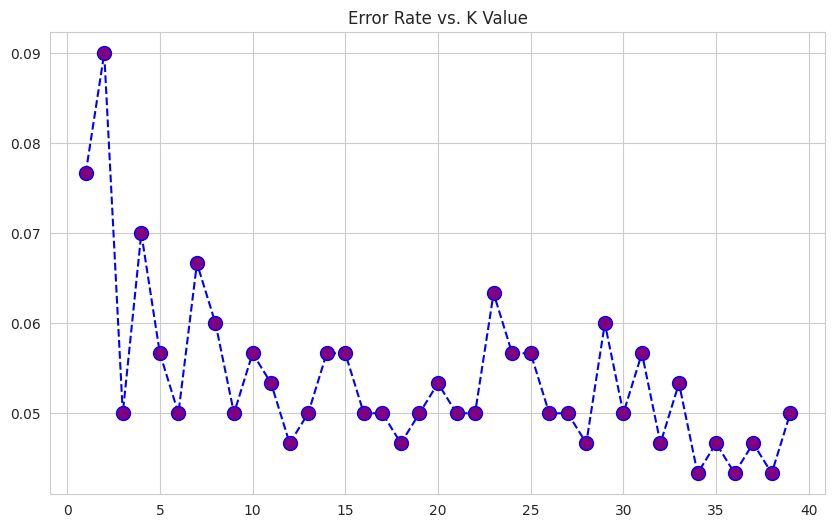

In [ ]:
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='purple', markersize=10)
plt.title('Error Rate vs. K Value')


From the behaviour of the graph, we can conclude that the most optimal down that also doesn't represent too much resources is 18 neighbours.